# Assignment: Marketing - Regression

Web Scrapping

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from lxml import etree

In [2]:
# Initialize parser
parser = etree.HTMLParser()

# First page
url = "https://admn5015-340805.uc.r.appspot.com/2018-01-01.html"

# Open URL
respose = requests.get(url, timeout=15)
html = respose.text

In [3]:
# Parse HTML
soup = BeautifulSoup(html, "html.parser")

In [4]:
date = soup.find("td", {"id": "date"}).text
print(date)

price = soup.find("td", {"id": "price"}).text
print(price)

likes = soup.find("td", {"id": "likes"}).text
print(likes)

dislikes = soup.find("td", {"id": "dislikes"}).text
print(dislikes)

followers = soup.find("td", {"id": "followers"}).text
print(followers)

2018-01-01
$ 1006.39 CAD
9001
402
15002


Running the URL in loop statement

In [5]:
# Initialize parser
def parse_html(url):
    response = requests.get(url)
    html = response.text
    soup = BeautifulSoup(html, "html.parser")
    date = soup.find("td", {"id": "date"}).text
    price = soup.find("td", {"id": "price"}).text
    likes = soup.find("td", {"id": "likes"}).text
    dislikes = soup.find("td", {"id": "dislikes"}).text
    followers = soup.find("td", {"id": "followers"}).text
    return {"Date": date, "Price": price, "Likes": likes, "Dislikes": dislikes, "Followers": followers}

In [6]:
# Define start and end dates
start_date = datetime(2018, 1, 1)
end_date = datetime(2023, 12, 31)
current_date = start_date

# Initialize empty list to store data
data = []

In [7]:
# Loop through dates
while current_date <= end_date:
    url = f"https://admn5015-340805.uc.r.appspot.com/{current_date.strftime('%Y-%m-%d')}.html"
    try:
        data.append(parse_html(url))
        print(f"Processed {url}")
    except Exception as e:
        print(f"Error processing {url}: {e}")

    # Move to next date
    current_date += timedelta(days=1)

Processed https://admn5015-340805.uc.r.appspot.com/2018-01-01.html
Processed https://admn5015-340805.uc.r.appspot.com/2018-01-02.html
Processed https://admn5015-340805.uc.r.appspot.com/2018-01-03.html
Processed https://admn5015-340805.uc.r.appspot.com/2018-01-04.html
Processed https://admn5015-340805.uc.r.appspot.com/2018-01-05.html
Processed https://admn5015-340805.uc.r.appspot.com/2018-01-06.html
Processed https://admn5015-340805.uc.r.appspot.com/2018-01-07.html
Processed https://admn5015-340805.uc.r.appspot.com/2018-01-08.html
Processed https://admn5015-340805.uc.r.appspot.com/2018-01-09.html
Processed https://admn5015-340805.uc.r.appspot.com/2018-01-10.html
Processed https://admn5015-340805.uc.r.appspot.com/2018-01-11.html
Processed https://admn5015-340805.uc.r.appspot.com/2018-01-12.html
Processed https://admn5015-340805.uc.r.appspot.com/2018-01-13.html
Processed https://admn5015-340805.uc.r.appspot.com/2018-01-14.html
Processed https://admn5015-340805.uc.r.appspot.com/2018-01-15.

In [8]:
# Create DataFrame
df = pd.DataFrame(data)

In [9]:
df.head()

,Date,Price,Likes,Dislikes,Followers
0,2018-01-01,$ 1006.39 CAD,9001,402,15002
1,2018-01-02,$ 1011.81 CAD,9003,403,15003
2,2018-01-03,$ 1017.26 CAD,9004,405,15004
3,2018-01-04,$ 1022.74 CAD,9006,407,15006
4,2018-01-05,$ 1028.25 CAD,9008,408,15008


In [10]:
# Save DataFrame as CSV
df.to_csv("parsed_data.csv", index=False)

In [11]:
# Cleaning
df = pd.read_csv("parsed_data.csv")
df["Price"] = df["Price"].str.replace("$", "").str.replace("CAD", "").str.strip()
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")
df = df.dropna(subset=["Price"])

df["Date"] = pd.to_datetime(df["Date"])

In [12]:
df.head()

,Date,Price,Likes,Dislikes,Followers
0,2018-01-01,1006.39,9001,402,15002
1,2018-01-02,1011.81,9003,403,15003
2,2018-01-03,1017.26,9004,405,15004
3,2018-01-04,1022.74,9006,407,15006
4,2018-01-05,1028.25,9008,408,15008


Regression

In [13]:
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lars
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.svm import SVR
from sklearn.svm import NuSVR
from sklearn.svm import LinearSVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.isotonic import IsotonicRegression
from sklearn.ensemble import RandomForestRegressor

In [14]:
# Examine data
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,2191,2020-12-31 00:00:00,2018-01-01 00:00:00,2019-07-02 12:00:00,2020-12-31 00:00:00,2022-07-01 12:00:00,2023-12-31 00:00:00,NaN
Price,2191.0,117997.803432,1006.39,7312.32,34942.15,162689.8,445911.69,166245.77492
Likes,2191.0,11127.217252,9001.0,10001.0,11202.0,12199.5,13396.0,1267.897539
Dislikes,2191.0,2064.840712,402.0,1234.5,2071.0,2893.0,3714.0,959.902626
Followers,2191.0,17125.631219,15002.0,16011.0,17199.0,18199.0,19377.0,1261.799955


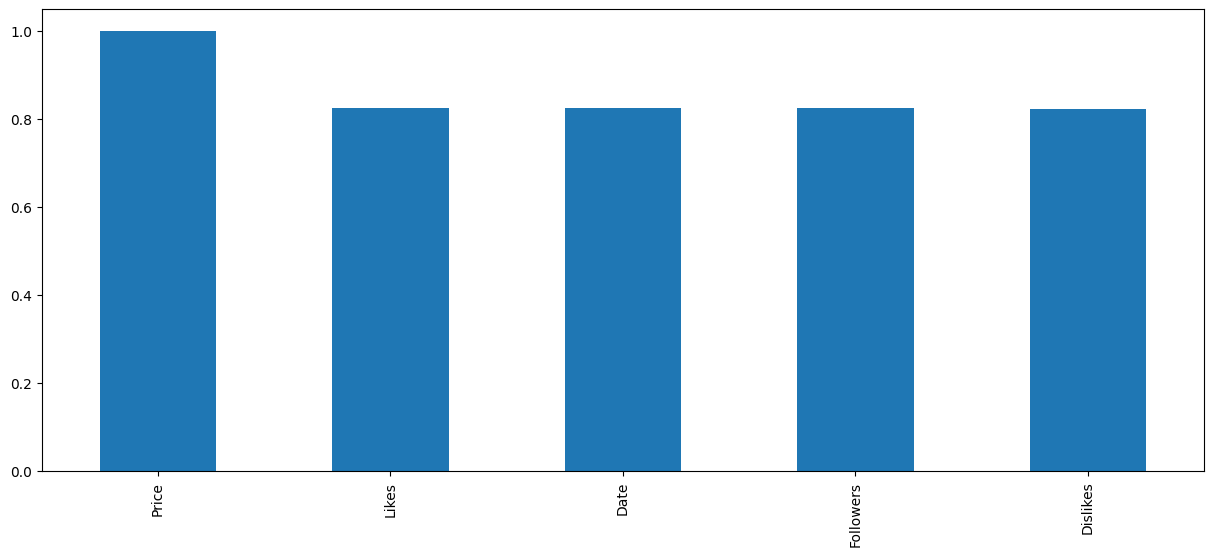

In [15]:
# Plot data
plt.figure(figsize=(15,6))
bars = df.corr()['Price'].sort_values(ascending=False).plot(kind='bar')

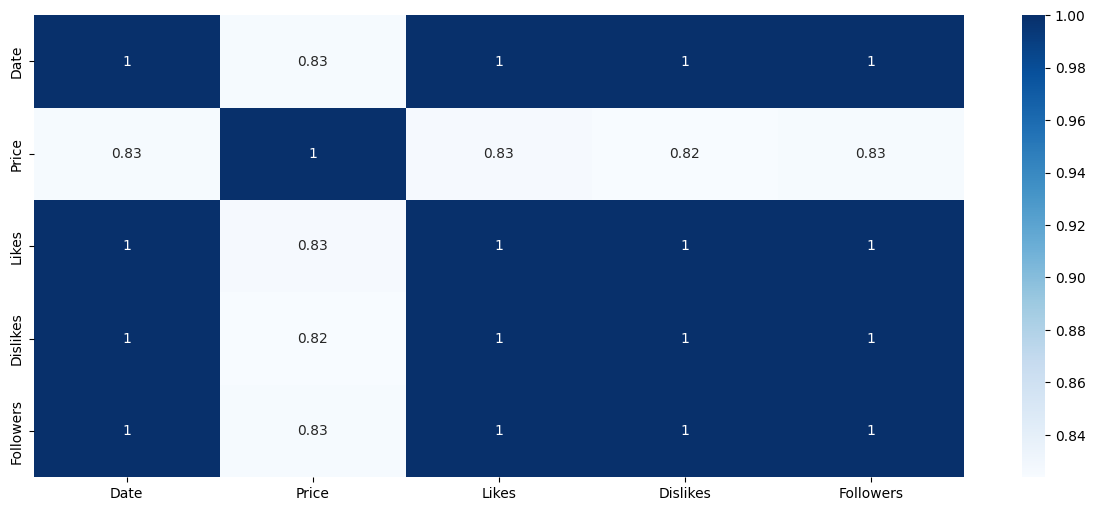

In [16]:
# Create a heatmap
plt.figure(figsize=(15,6))
heatmap = sns.heatmap(df.corr(), annot=True, cmap="Blues")

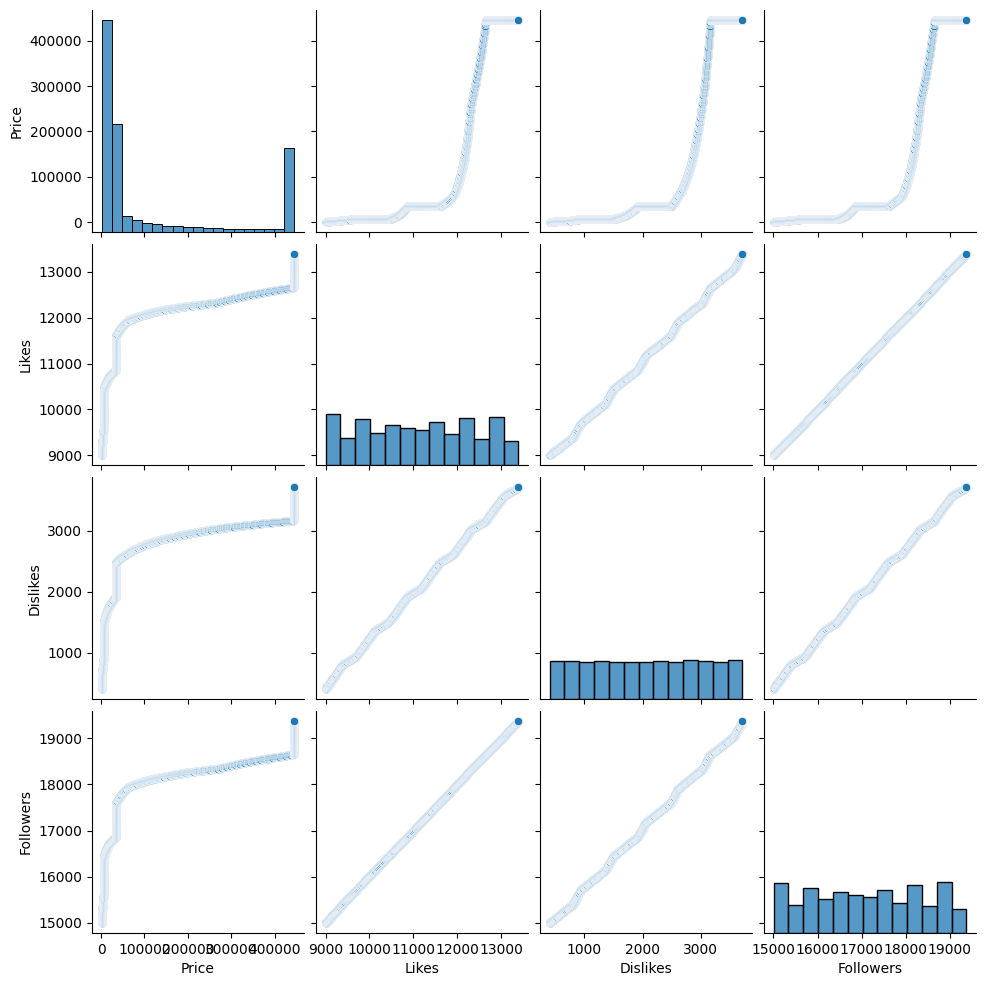

In [17]:
sns.pairplot(df)

In [18]:
# Create traning and testing datasets
x = df[['Likes', 'Dislikes', 'Followers']]
y = df['Price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [19]:
# Identify the best model
regressors = {
    "XGBRegressor": XGBRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "GaussianProcessRegressor": GaussianProcessRegressor(),
    "SVR": SVR(),
    "NuSVR": NuSVR(),
    "Ridge":Ridge(),
    "Lars": Lars(),
    "HuberRegressor": HuberRegressor(),
    "PassiveAggressiveRegressor": PassiveAggressiveRegressor(),
    "ARDRegression": ARDRegression(),
    "BayesianRidge": BayesianRidge(),
    "ElasticNet": ElasticNet(),
    "OrthogonalMatchingPursuit": OrthogonalMatchingPursuit(),
}


In [20]:
df_models = pd.DataFrame(columns=['model', 'run_time', 'rmse'])
for key in regressors:
    print('*',key)
    start_time = time.time()
    regressor = regressors[key]
    model = regressor.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    scores = cross_val_score(model,
                             x_train,
                             y_train,
                             scoring="neg_mean_squared_error",
                             cv=10)
    row = {'model': key,
           'run_time': format(round((time.time() - start_time)/60,2)),
           'rmse': round(np.sqrt(mean_squared_error(y_test, y_pred)))
    }
    df_models = pd.concat([df_models, pd.DataFrame.from_records([row])])

* XGBRegressor
* RandomForestRegressor
* DecisionTreeRegressor
* GaussianProcessRegressor
* SVR
* NuSVR
* Ridge
* Lars
* HuberRegressor
* PassiveAggressiveRegressor
* ARDRegression
* BayesianRidge
* ElasticNet
* OrthogonalMatchingPursuit


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.748e+12, tolerance: 4.242e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.065e+12, tolerance: 3.827e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.122e+12, tolerance: 3.854e

In [21]:
# Order model results
df_models.head(20).sort_values(by='rmse', ascending=True)

,model,run_time,rmse
0,RandomForestRegressor,0.1,311
0,DecisionTreeRegressor,0.0,599
0,XGBRegressor,0.01,1493
0,Ridge,0.0,89586
0,Lars,0.0,89586
0,ARDRegression,0.0,89622
0,BayesianRidge,0.0,89631
0,ElasticNet,0.0,92150
0,OrthogonalMatchingPursuit,0.0,92566
0,HuberRegressor,0.0,109717


In [22]:
# Evaluate the best model
best_model = RandomForestRegressor(random_state=42)

In [23]:
best_model.fit(x, y)

RandomForestRegressor(random_state=42)

In [24]:
# Predict the price for January 1st, 2024
feature_names = x.columns
features_2024 = [[13396, 3714, 19377]]
price_2024 = best_model.predict(features_2024)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [25]:
print("Predicted price for January 1st, 2024:", price_2024)

Predicted price for January 1st, 2024: [445592.0406]


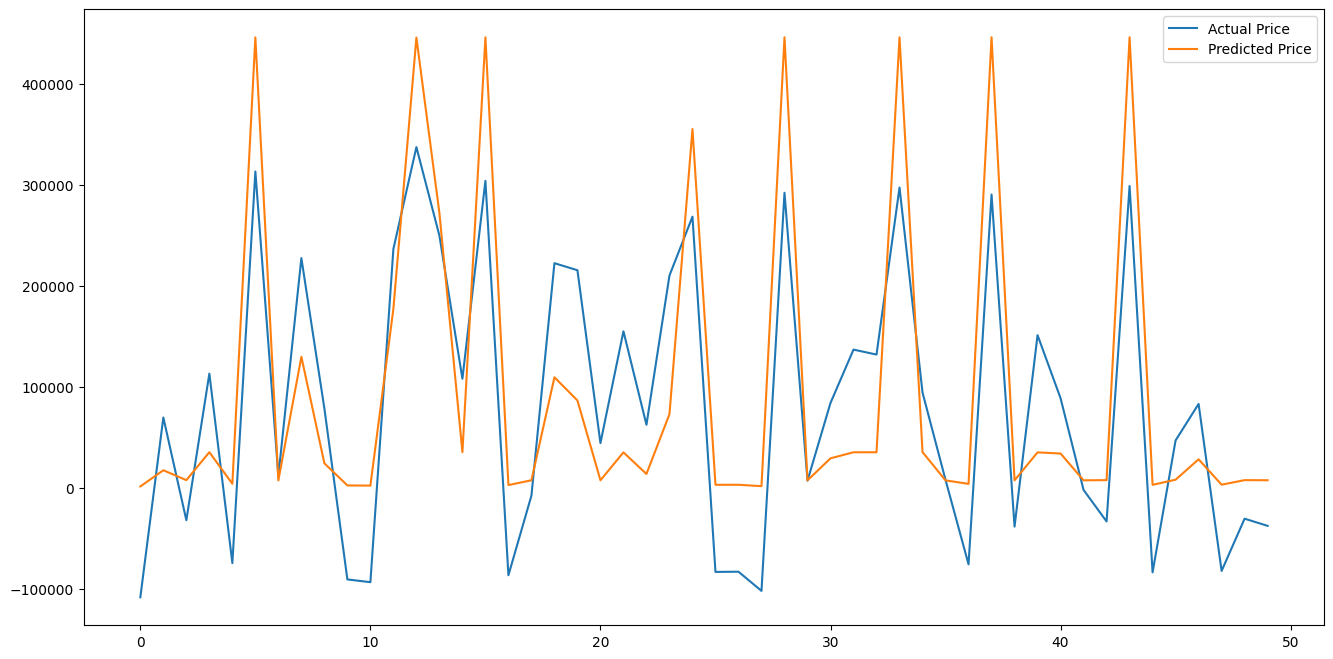

In [26]:
# Plot

test = pd.DataFrame({'Predicted Price':y_pred, 'Actual Price':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual Price','Predicted Price'])

## Interpreting the Visualizations and Findings



**Data Collection:**

*   Period: January 1st, 2018 to December 31st, 2023.
*   Fields Collected: Date, Price, Likes, Dislikes, and Followers.
*   Method: Parsing of webpage
*   Data Cleaning: Removed "$" and "CAD" from the price column.
*   Data Stored: Saved in CSV format.

**Exploratory Data Analysis:**

*   Correlation Analysis: Data suggests that metrics like likes and followers significantly correlate with the chair's price, serving as indicators of value or popularity which in turn could justify higher pricing
*   Heatmap Visualization: Graph shows that there is a strong interconnection between likes, dislikes, followers and pricing over time. This pattern supports the conclusion that more engaged or followed products tend to be priced higher, possibly reflecting their popularity.

**Predictive Modeling:**

*   Model Selection: RandomForestRegressor was chosen for its low RMSE, indicating high prediction accuracy.
*   Predictions: The model predicted a product price of approximately $445,592.04 CAD for January 1, 2024, based on historical data.

**Findings:**

*   The model captures the dynamic pricing behavior influenced by metrics. Despite
high accuracy, occasional deviations in peak price predictions suggest areas for model refinement. Actual versus predicted prices plotted over time demonstrated the model's accuraccy, closely mirroring actual pricing trends with high accuracy.

**Conclusions:**

* The analysis uses RandomForestRegressor has effectively demonstrated the influence of metrics on chair's pricing, with the model accurately forecasting price trends. While the model closely mirrors actual pricing data, occasional discrepancies in peak values suggest the need for further refinement. It is recommended to explore additional features that may impact pricing, such as market trends and to continue model tuning to adapt to other factors. By using these insights we can significantly enhance strategic planning, allowing for more informed decisions on pricing and marketing efforts to optimize revenue.











